In [1]:
'''CHECKING HOW DATA LOOK LIKE'''
!ls ../data/set

 An_Se_Young_Pornpawee_Chochuwong_TOYOTA_THAILAND_OPEN_2021_QuarterFinals
 An_Se_Young_Ratchanok_Intanon_YONEX_Thailand_Open_2021_QuarterFinals
 Anders_ANTONSEN_CHOU_Tien_Chen_China_Open_2019_QuarterFinal
'Anders_ANTONSEN_Jonatan_CHRISTIE Indonesia_Masters_2020_QuarterFinals'
 Anders_Antonsen_Sameer_Verma_TOYOTA_THAILAND_OPEN_2021_QuarterFinals
 Anders_Antonsen_Viktor_Axelsen_HSBC_BWF_WORLD_TOUR_FINALS_2020_Finals
 Anders_Antonsen_Wang_Tzu_Wei_HSBC_BWF_WORLD_TOUR_FINALS_2020_SemiFinals
 Anthony_Sinisuka_GINTING_Anders_ANTONSEN_Indonesia_Masters_2020_Final
 Anthony_Sinisuka_GINTING_CHOU_Tien_Chen_Hong_Kong_Open_2019_Quarter_Finals
'Anthony_Sinisuka_GINTING_Viktor_AXELSEN _Indonesia_Masters_2020_SemiFinals'
 Anthony_Sinisuka_Ginting_Lee_Zii_Jia_HSBC_BWF_WORLD_TOUR_FINALS_2020_QuarterFinals
 Anthony_Sinisuka_Ginting_Rasmus_Gemke_YONEX_Thailand_Open_2021_QuarterFinals
 CHEN_Long_CHOU_Tien_Chen_Denmark_Open_2019_QuarterFinal
 CHEN_Long_CHOU_Tien_Chen_World_Tour_Finals_Group_Stage
 CHEN_Yufe

In [2]:
'''GETTING DATA INFORMATION'''
import os
from os.path import join, isdir

data_dir = '../data/set'
all_files = os.listdir(data_dir)

# get csv files
csv_files = [fn for fn in all_files if '.csv' in fn]
print('All csv files: {}'.format(csv_files))

# get all dir names
dir_names = [fn for fn in all_files if isdir(join(data_dir, fn))]
print(f'Number of dirs: {len(dir_names)}')


All csv files: ['homography_new.csv', 'match.csv']
Number of dirs: 75


In [3]:
'''LOAD CSV FILES'''
import pandas as pd
homography = pd.read_csv(join(data_dir,'homography_new.csv'))
match = pd.read_csv(join(data_dir,'match.csv'))


In [4]:
homography.head()

,id,video,homography_matrix,upleft_x,upright_x,downright_x,downleft_x,upleft_y,upright_y,downright_y,downleft_y,db
0,23,Kento_MOMOTA_CHOU_Tien_Chen_Fuzhou_Open_2019_F...,"[[1.061381454360416, 0.34899269168789687, -495...",407.6,867.0,973.0,307.2,308.6,307.4,669.4,671.2,2
1,24,Anthony_Sinisuka_GINTING_CHOU_Tien_Chen_Hong_K...,"[[-2.620653400690729, -1.7731092966351596, 211...",552.2,859.2,963.4,393.4,419.0,416.4,691.0,688.0,2
2,25,CHEN_Long_CHOU_Tien_Chen_World_Tour_Finals_Gro...,"[[3.228159382731356, 1.8532638959878822, -1874...",415.4,863.4,1018.4,262.8,358.2,358.2,677.2,672.0,2
3,26,CHEN_Yufei_TAI_Tzu_Ying_Malaysia_Masters_2020_...,"[[3.3911449073769866, 2.4472665103297335, -230...",416.2,879.6,945.4,225.8,422.4,422.2,723.8,718.0,2
4,28,Kento_MOMOTA_CHOU_Tien_Chen_KOREA_OPEN_2019_Final,"[[1.4600518664984499, 0.7133493358353787, -759...",420.6,858.8,1009.0,266.2,286.2,287.0,660.4,659.2,2


In [5]:
match.head()

,id,video,tournament,round,year,month,day,set,duration,winner,loser,downcourt,db
0,23,Kento_MOMOTA_CHOU_Tien_Chen_Fuzhou_Open_2019_F...,Fuzhou Open 2019,Finals,2019.0,11.0,10.0,3,83,Kento MOMOTA,CHOU Tien Chen,0.0,0.0
1,24,Anthony_Sinisuka_GINTING_CHOU_Tien_Chen_Hong_K...,Hong Kong Open 2019,Quarter-finals,2019.0,11.0,15.0,3,49,Anthony Sinisuka GINTING,CHOU Tien Chen,1.0,0.0
2,25,CHEN_Long_CHOU_Tien_Chen_World_Tour_Finals_Gro...,World Tour Finals,Group-Stage,2019.0,12.0,13.0,2,52,CHEN Long,CHOU Tien Chen,1.0,0.0
3,26,CHEN_Yufei_TAI_Tzu_Ying_Malaysia_Masters_2020_...,Malaysia Masters 2020,Finals,2020.0,1.0,12.0,2,37,CHEN Yufei,TAI Tzu Ying,1.0,0.0
4,28,Kento_MOMOTA_CHOU_Tien_Chen_KOREA_OPEN_2019_Final,KOREA OPEN 2019,Finals,2019.0,9.0,29.0,2,53,Kento MOMOTA,CHOU Tien Chen,1.0,0.0


In [6]:
'''CHECKING IF DATA IN TABLES ABOVE MATCH'''
print('Number of IDs for videos in match: {}, and homography, {}'.format(homography.id.size, match.id.size))

for i, match_id in enumerate(match.id):
    if homography.id.iloc[i] != match_id:
        print('homography.id: {} == match.id: {}'.format(homography.id[i-1],match.id[i-1]))
        print('homography.id: {} != match.id: {}'.format(homography.id[i],match_id))
        print('homography.id: {} ?? match.id: {}'.format(homography.id[i+1],match.id[i+1]))
        break

Number of IDs for videos in match: 76, and homography, 75
homography.id: 64 == match.id: 64
homography.id: 65 != match.id: 66
homography.id: 66 ?? match.id: 67


In [7]:
homography.loc[homography.id==65]


,id,video,homography_matrix,upleft_x,upright_x,downright_x,downleft_x,upleft_y,upright_y,downright_y,downleft_y,db
41,65,Carolina_Marin_An_Se_Young_YONEX_Thailand_Open...,"[[1.2348056632286435, 0.5032850723613181, -611...",412.8,863.2,987.0,289.6,302.8,301.6,656.4,660.8,2


In [8]:
match.loc[match.id==66]

,id,video,tournament,round,year,month,day,set,duration,winner,loser,downcourt,db
41,66,Viktor_Axelsen_Anthony_Sinisuka_Ginting_YONEX_...,YONEX THAILAND OPEN 2021,Semi-finals,2021.0,1.0,16.0,3,63,Viktor AXELSEN,Anthony Sinisuka GINTING,1.0,0.0


In [9]:
'''
IT SEEMS LIKE WE DON'T HAVE 
match.id: 65
RIGHT NOW I'M NOT SURE IF I NEED TO DROP
homography.id: 65
WILL SEE
'''

"\nIT SEEMS LIKE WE DON'T HAVE \nmatch.id: 65\nRIGHT NOW I'M NOT SURE IF I NEED TO DROP\nhomography.id: 65\nWILL SEE\n"

In [10]:
'''CHECKING IF DIRS MATCH DIR NAMES IN TABES ABOVE'''
print('Number of videos for:\nDIRS: {}\nmatch: {}\nhomography: {}'
      .format(len(dir_names),match.video.size,homography.video.size))

print('\nmatch.video names that not in DIRS')
for m_video in match.video.values:
    if m_video not in dir_names:
        print(m_video)

print('\nhomography.video names that not in DIRS')
for h_video in homography.video.values:
    if h_video not in dir_names:
        print(h_video)

print('\nFolders that not in match.video')
for d_video in dir_names:
    if d_video not in match.video.values:
        print(d_video)
        
print('\nFolders that not in homography.video')
for d_video in dir_names:
    if d_video not in homography.video.values:
        print(d_video)
        
print('\nmatch.video that not in homography.video')
for m_video in match.video.values:
    if m_video not in homography.video.values:
        print(m_video)
        
print('\nhomography.video that not in match.video')
for h_video in homography.video.values:
    if h_video not in match.video.values:
        print(h_video)

Number of videos for:
DIRS: 75
match: 75
homography: 76

match.video names that not in DIRS
Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_Group_Stage

homography.video names that not in DIRS
Carolina_Marin_An_Se_Young_YONEX_Thailand_Open_2021_SemiFinals
Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_QuarterFinals

Folders that not in match.video
.ipynb_checkpoints

Folders that not in homography.video
.ipynb_checkpoints

match.video that not in homography.video
Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_Group_Stage

homography.video that not in match.video
Carolina_Marin_An_Se_Young_YONEX_Thailand_Open_2021_SemiFinals
Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_QuarterFinals


  
Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_Group_Stage  
NOT IN ANY OF TABLES BUT WE HAVE DIR WITH THE GAME  
  
Carolina_Marin_An_Se_Young_YONEX_Thailand_Open_2021_SemiFinals  
IN homography.video BUT DIR WITH THE GAME DOES'T EXIST  
I WILL REMOVE IT FROM homography  
  
BECAUSE 
Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_Group_Stage  
DOES'T HAVE HOMOGRAPHY I WILL DROP FROM match.video  
AND  
Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_QuarterFinals  
DROP FROM homography.video  

In [11]:
rm -rf ../data/set/Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_Group_Stage

In [12]:
rm -rf ../data/set/Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_QuarterFinals

In [13]:
'''DROPING BAD VIDIOS'''
vid_not_exist = 'Carolina_Marin_An_Se_Young_YONEX_Thailand_Open_2021_SemiFinals'
index = homography.index[homography.video==vid_not_exist]
homography.drop(index=index, inplace=True)

match_not_exist = 'Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_QuarterFinals'
index = homography.index[homography.video==match_not_exist]
homography.drop(index=index, inplace=True)

hom_not_exist = 'Viktor_Axelsen_Chou_Tien_Chen_HSBC_BWF_WORLD_TOUR_FINALS_2020_Group_Stage'
index = match.index[match.video==hom_not_exist]
match.drop(index=index, inplace=True)


In [14]:
'''LOAD DATA FROM ONE FOLDER'''
path = join(data_dir, dir_names[0])
files = os.listdir(path)
print(f'Files in:\n"{path}":\n{files}')

# loading one set
set_one = pd.read_csv(join(path, files[0]))
set_one.head()

Files in:
"../data/set/Tai_Tzu_Ying_Ratchanok_Intanon_TOYOTA_THAILAND_OPEN_2021_SemiFinals":
['set3.csv', 'set1.csv', 'set2.csv']


,rally,ball_round,time,frame_num,roundscore_A,roundscore_B,player,server,type,aroundhead,...,win_reason,getpoint_player,flaw,player_location_area,player_location_x,player_location_y,opponent_location_area,opponent_location_x,opponent_location_y,db
0,1,1.0,00:40:40,73229.0,1,0,A,1,發短球,NaN,...,NaN,NaN,NaN,8.0,614.0,366.0,8.0,716.0,564.0,0
1,1,2.0,00:40:41,73252.0,1,0,B,2,放小球,NaN,...,NaN,NaN,NaN,7.0,729.0,504.0,8.0,640.0,358.0,0
2,1,3.0,00:40:42,73280.0,1,0,A,2,挑球,NaN,...,NaN,NaN,NaN,7.0,763.0,399.0,8.0,676.0,517.0,0
3,1,4.0,00:40:44,73323.0,1,0,B,2,點扣,1.0,...,NaN,NaN,NaN,9.0,552.0,626.0,8.0,599.0,360.0,0
4,1,5.0,00:40:44,73336.0,1,0,A,2,擋小球,NaN,...,NaN,NaN,NaN,8.0,583.0,352.0,8.0,520.0,610.0,0


In [15]:
match.video[40]

'Viktor_Axelsen_Jonatan_Christie_YONEX_Thailand_Open_2021_QuarterFinals'

In [16]:
os.listdir(match_dir)

NameError: name 'match_dir' is not defined

In [17]:
'''FOR EACH VIDEO_NAME LOAD SETS AND CONCATINATE THEM'''
all_matches = None

for match_id, video_name in enumerate(match.video):
    match_dir = join(data_dir,video_name)
    set_names = [fn for fn in os.listdir(match_dir) if ('.ipynb' not in fn and 'lock' not in fn)]
    set_paths = [join(match_dir,fn) for fn in set_names]
    
    this_match = None
    
    for set_id, path in enumerate(set_paths):
        set_df = pd.read_csv(path)
        
        # Set set_id
        set_df['set_id'] = set_id
        
        if this_match is None:
            this_match = set_df
        else:
            assert (this_match.columns == set_df.columns).all(), 'Columns are different!'
            this_match = pd.concat([this_match, set_df], ignore_index=True)
        
    # Set match_id and video_name
    this_match['match_id'] = match_id
    this_match['video_name'] = video_name
    
    # Insert winner and loser of this match
    this_match['winner'] = match.loc[match.video==video_name].winner.values[0].lower()
    this_match['loser'] = match.loc[match.video==video_name].loser.values[0].lower()
    
    if all_matches is None:
        all_matches = this_match
    else:
        assert (all_matches.columns == this_match.columns).all(), 'Columns are different!' 
        all_matches = pd.concat([all_matches, this_match], ignore_index=True)

all_matches.rename(columns={'rally':'rally_id'}, inplace=True)

In [18]:
all_matches.columns

Index(['rally_id', 'ball_round', 'time', 'frame_num', 'roundscore_A',
       'roundscore_B', 'player', 'server', 'type', 'aroundhead', 'backhand',
       'hit_height', 'hit_area', 'hit_x', 'hit_y', 'landing_height',
       'landing_area', 'landing_x', 'landing_y', 'lose_reason', 'win_reason',
       'getpoint_player', 'flaw', 'player_location_area', 'player_location_x',
       'player_location_y', 'opponent_location_area', 'opponent_location_x',
       'opponent_location_y', 'db', 'set_id', 'match_id', 'video_name',
       'winner', 'loser'],
      dtype='object')

In [19]:
all_matches.head()

,rally_id,ball_round,time,frame_num,roundscore_A,roundscore_B,player,server,type,aroundhead,...,player_location_y,opponent_location_area,opponent_location_x,opponent_location_y,db,set_id,match_id,video_name,winner,loser
0,1,1.0,01:00:47,91191.0,1,0,B,1,發短球,NaN,...,375.0,8.0,751.0,565.0,0,0,0,Kento_MOMOTA_CHOU_Tien_Chen_Fuzhou_Open_2019_F...,kento momota,chou tien chen
1,1,2.0,01:00:48,91205.0,1,0,A,2,放小球,NaN,...,547.0,8.0,634.0,361.0,0,0,0,Kento_MOMOTA_CHOU_Tien_Chen_Fuzhou_Open_2019_F...,kento momota,chou tien chen
2,1,3.0,01:00:49,91226.0,1,0,B,2,放小球,NaN,...,386.0,8.0,614.0,554.0,0,0,0,Kento_MOMOTA_CHOU_Tien_Chen_Fuzhou_Open_2019_F...,kento momota,chou tien chen
3,1,4.0,01:00:50,91251.0,1,0,A,2,放小球,NaN,...,522.0,8.0,636.0,369.0,0,0,0,Kento_MOMOTA_CHOU_Tien_Chen_Fuzhou_Open_2019_F...,kento momota,chou tien chen
4,1,5.0,01:00:50,91270.0,1,0,B,3,撲球,NaN,...,414.0,8.0,630.0,538.0,0,0,0,Kento_MOMOTA_CHOU_Tien_Chen_Fuzhou_Open_2019_F...,kento momota,chou tien chen


OK NOW I SURE THAT THIS SHIT IS PUTTED TOGETHER PROPERLY I NEED PREPROCESS IT:
- Remaping coodinates
- Remaping hit_types

In [20]:
'''REMAPING COORDINATES'''
import numpy as np

def h_str2mat(h_mat):
    # TRANSFORM STR TO ARRAY
    array = [s.replace('[','').replace(']','') for s in h_mat.split('], ')]
    h_arr = np.zeros((3,3), dtype=float)
    for i,s in enumerate(array):
        for j,v in enumerate(s.split(', ')):
            h_arr[i,j] = float(v)
    return h_arr

for i, row in homography.iterrows():
    homography_matrix = h_str2mat(row.homography_matrix)
    
    cond = all_matches.video_name==row.video
    this_match = all_matches.loc[cond]
    
    xlabels = ['landing_x', 'hit_x', 'player_location_x', 'opponent_location_x']
    ylabels = ['landing_y', 'hit_y', 'player_location_y', 'opponent_location_y']
    
    for xlabel, ylabel in zip(xlabels,ylabels):
        size = this_match.shape[0]
        p = np.array((this_match[xlabel].values, 
                      this_match[ylabel].values, 
                      np.zeros(size)+1))

        p_real = homography_matrix @ p
        p_real /= p_real[2]

        all_matches.loc[cond, xlabel] = p_real[0]
        all_matches.loc[cond, ylabel] = p_real[1]

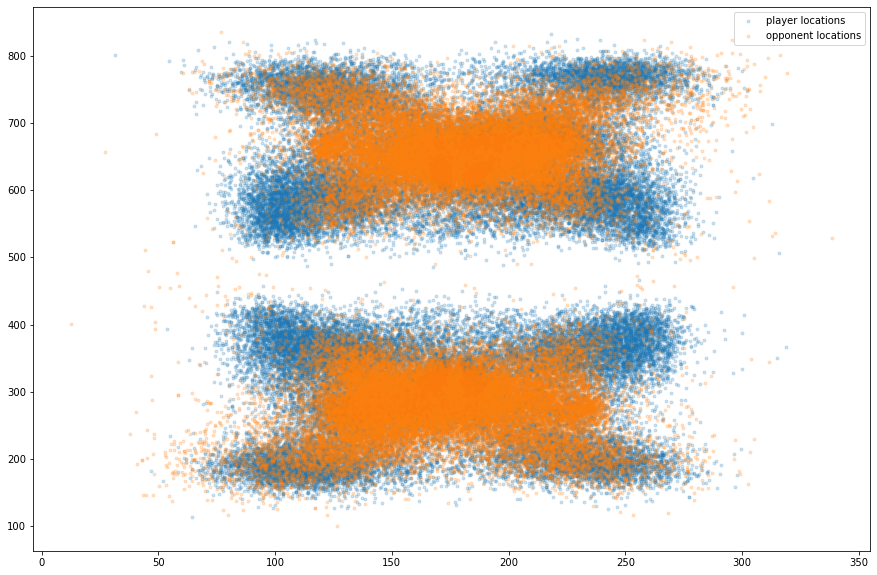

In [21]:
import matplotlib.pyplot as plt
x = all_matches[['player_location_x','player_location_y','opponent_location_x','opponent_location_y']].values.T
plt.figure(figsize=(15,10))
plt.plot(x[0], x[1], '.', alpha=0.2, label='player locations')
plt.plot(x[2], x[3], '.', alpha=0.2, label='opponent locations')
plt.legend()
plt.show()


SEEMS LIKE COORDINATES REMAPED SUCSESSFULY NOW  TIME FOR

TIME TO DEAL WITH MISSING VALUES  
AND SELECTING FEATURES THAT I NEED  
I WILL START WITH DRIOPPING ALL flaw RAWS!

In [22]:
'''DROP flaw ACTIONS'''
index = all_matches.index[all_matches.flaw==1]
expected_size = (all_matches.shape[0] - index.shape[0])
all_matches.drop(index, inplace=True)

assert expected_size == all_matches.shape[0]

NOW I WANT TO SELECT ONLY DATA I NEED  
AND ONLY THEN HANDLE NONE  
AND CHECK FOR CONTINUITY LIKE:
- [x] CHECK IF PLAYER MAKE ONLY ONE CONSECATIVE HIT
- [x] REMOVE RALLYES WITH ONE HIT ONLY
- [x] AND ALSO I NEED TO REPLACE A/B PLAYERS TO THEIR REAL NAMES OR PLAYER_ID

In [23]:
'''SELECT FEATURES'''
print(all_matches.columns)

feature_names = ['ball_round', 'player', 'roundscore_A', 'roundscore_B', 
                 'player_location_x', 'player_location_y',
                 'opponent_location_x', 'opponent_location_y',
                 'match_id', 'set_id', 'rally_id', 'video_name',
                 'winner', 'loser', 'type']
matches = all_matches[feature_names]

Index(['rally_id', 'ball_round', 'time', 'frame_num', 'roundscore_A',
       'roundscore_B', 'player', 'server', 'type', 'aroundhead', 'backhand',
       'hit_height', 'hit_area', 'hit_x', 'hit_y', 'landing_height',
       'landing_area', 'landing_x', 'landing_y', 'lose_reason', 'win_reason',
       'getpoint_player', 'flaw', 'player_location_area', 'player_location_x',
       'player_location_y', 'opponent_location_area', 'opponent_location_x',
       'opponent_location_y', 'db', 'set_id', 'match_id', 'video_name',
       'winner', 'loser'],
      dtype='object')


In [24]:
matches.isna().sum()

ball_round             0
player                 0
roundscore_A           0
roundscore_B           0
player_location_x      0
player_location_y      0
opponent_location_x    0
opponent_location_y    0
match_id               0
set_id                 0
rally_id               0
video_name             0
winner                 0
loser                  0
type                   0
dtype: int64

WOW IT SEEMS LIKE WE DON'T HAVE ANY MISSING VALUES  
NOW TIME TO CHECK DISTRIBUTIONS

In [25]:
matches.describe()

,ball_round,roundscore_A,roundscore_B,player_location_x,player_location_y,opponent_location_x,opponent_location_y,match_id,set_id,rally_id
count,58917.000000,58917.000000,58917.000000,58917.000000,58917.000000,58917.000000,58917.000000,58917.000000,58917.000000,58917.000000
mean,8.551657,10.222024,8.721540,174.747981,473.592152,175.775641,470.444486,34.243835,0.717246,18.943565
std,7.278079,6.043667,5.541086,52.982958,193.746598,37.076571,195.985556,22.080685,0.718662,10.951035
min,1.000000,0.000000,0.000000,31.342014,113.732513,12.769362,100.108462,0.000000,0.000000,1.000000
25%,3.000000,5.000000,4.000000,126.946339,307.794834,148.308126,283.548946,14.000000,0.000000,10.000000
50%,6.000000,10.000000,8.000000,173.007818,441.138130,175.311092,515.578515,33.000000,1.000000,19.000000
75%,12.000000,15.000000,13.000000,222.293683,639.190276,202.975340,658.038352,53.000000,1.000000,28.000000
max,65.000000,25.000000,26.000000,318.561317,832.100054,338.568545,835.339678,73.000000,2.000000,50.000000


SEEMS GOOD  
TIME TO REPLACE A/B WITH ACTUAL PLAYER DATA SUCH AS ID

In [26]:
'''GET TRUE NAMES'''
for match_id in matches.match_id.unique():
    cond = matches.match_id==match_id
    this_match = matches.loc[cond]
    score_A = this_match.roundscore_A.values.sum()
    score_B = this_match.roundscore_B.values.sum()

    assert this_match.winner.unique().size == 1
    assert this_match.loser.unique().size == 1

    if score_A > score_B:    
        A_name = this_match.winner.unique()[0]
        B_name = this_match.loser.unique()[0]
    else:
        B_name = this_match.winner.unique()[0]
        A_name = this_match.loser.unique()[0]


    matches.loc[cond&(matches.player=='A'), 'player'] = A_name
    matches.loc[cond&(matches.player=='B'), 'player'] = B_name
    

/home/ivan/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [27]:
'''CHECK IF PLAYER MAKE ONLY ONE CONSECATIVE HIT'''
one_player_rally = []
one_player_hittwice = []

for match_id in matches.match_id.unique():
    _match = matches.loc[matches.match_id == match_id]
    for set_id in _match.set_id.unique():
        _set = _match.loc[_match.set_id == set_id]
        for rally_id in _set.rally_id.unique():
            _rally = _set.loc[_set.rally_id == rally_id]
            _rally = _rally.sort_values(by=['ball_round']).reset_index()
            
            players = _rally.player.values
            
            if players.size <= 1:
                one_player_rally += [[match_id, set_id, rally_id]]
       
            curr_player = players[0]
            for player in players[1:]:
                if curr_player == player:
                    one_player_hittwice += [[match_id, set_id, rally_id]]
                
                curr_player = player

In [28]:
'''DROP ONE PLAYER RALLY'''
for m, s, r in one_player_rally:
    cond = (matches.match_id==m)&(matches.set_id==s)&(matches.rally_id==r)
    matches = matches.drop(index=matches.index[cond])

In [29]:
'''DROP RALLY WHERE PLAYER HIT TWICE'''
for m, s, r in np.unique(one_player_hittwice, axis=0):
    cond = (matches.match_id==m)&(matches.set_id==s)&(matches.rally_id==r)
    matches = matches.drop(index=matches.index[cond])

In [30]:
'''RESET INDEX FOR ALL MATCHES'''
matches = matches.reset_index(drop=True)
matches = matches.drop(columns=['video_name', 'winner', 'loser'])

In [31]:
'''MAP 19 TYPES TO 11'''
matches['type'] = matches['type'].replace('小平球', '平球')
combined_types = {'切球': '切球', 
                  '過度切球': '切球', 
                  '點扣': '殺球', 
                  '殺球': '殺球', 
                  '平球': '平球', 
                  '後場抽平球': '平球', 
                  '擋小球': '接殺防守',
                  '防守回挑': '接殺防守', 
                  '防守回抽': '接殺防守', 
                  '放小球': '網前球', 
                  '勾球': '網前球', 
                  '推球': '推撲球', 
                  '撲球': '推撲球'}
matches['type'] = matches['type'].replace(combined_types)

In [32]:
'''REPLACE HIT_TYPE WITH ONEHOT ENCODING'''
# Get one hot encoding of columns B
one_hot = pd.get_dummies(matches['type'], prefix='hittype_')
# Drop column B as it is now encoded
matches = matches.drop('type',axis = 1)
# Join the encoded df
matches = matches.join(one_hot)
matches.head()

,ball_round,player,roundscore_A,roundscore_B,player_location_x,player_location_y,opponent_location_x,opponent_location_y,match_id,set_id,...,hittype__平球,hittype__挑球,hittype__接殺防守,hittype__推撲球,hittype__未知球種,hittype__殺球,hittype__發短球,hittype__發長球,hittype__網前球,hittype__長球
0,1.0,chou tien chen,1,0,163.723026,313.185472,232.831082,664.989251,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2.0,kento momota,1,0,215.715838,637.055181,175.215967,281.275812,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.0,chou tien chen,1,0,154.904742,337.550464,164.869325,647.555870,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4.0,kento momota,1,0,190.938191,596.615179,176.414283,299.712712,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,chou tien chen,1,0,190.703431,397.467483,172.873098,622.436677,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
'''RELAYCE PLAYERS WITH IDS'''
matches.player = matches.player.astype('category').cat.codes.astype(int)


NOW IT'S TIME CHECK FOR OUTLIERS
- [ ] NOTHING OUT OF BOUNDS
- [ ] DISTRIBUTIONS AND OUTLIERS!
- [x] NORMALIZATION (ROTATION?) OF COORDINATES

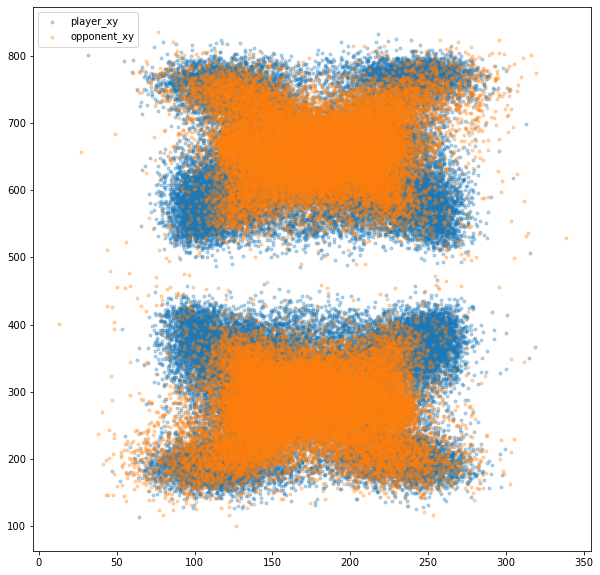

In [34]:
'''COORDINATES NORMALIZATION'''
plt.figure(figsize=(10,10))
plt.scatter(matches.player_location_x, matches.player_location_y, marker='.', alpha=0.3, label='player_xy')
plt.scatter(matches.opponent_location_x, matches.opponent_location_y, marker='.', alpha=0.3, label='opponent_xy')
# plt.plot((0,350), (467.5, 467.5), 'r--')
plt.legend()


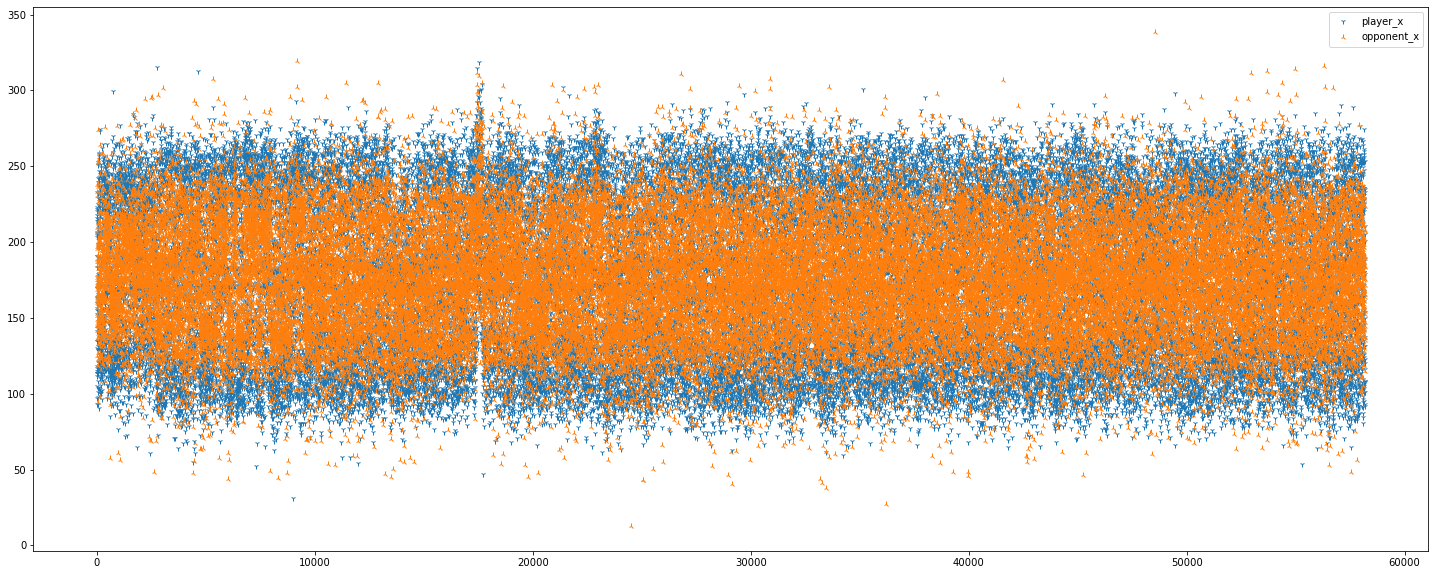

In [35]:
plt.figure(figsize=(25,10))
plt.plot(matches.player_location_x, '1', label='player_x')
plt.plot(matches.opponent_location_x, '2', label='opponent_x')
# plt.plot((0,350), (470, 470), 'r--')
plt.legend()

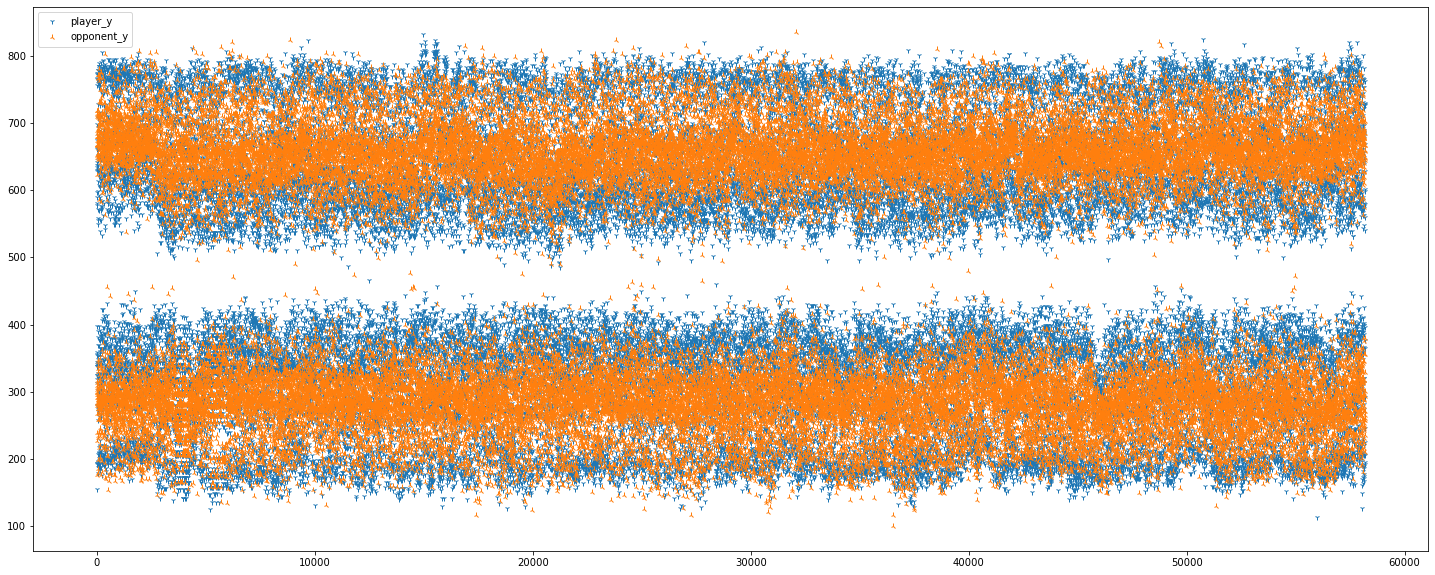

In [36]:
plt.figure(figsize=(25,10))
plt.plot(matches.player_location_y, '1', label='player_y')
plt.plot(matches.opponent_location_y, '2',label='opponent_y')
# plt.plot((0,58000), (467.5, 467.5), 'r--')
plt.legend()

In [37]:
# min: 100, max: 835
y_min = matches[['opponent_location_y','player_location_y']].min()
y_max = matches[['opponent_location_y','player_location_y']].max()
x_max = matches[['opponent_location_x','player_location_x']].max()

print(((y_max-y_min)/2)+100)
print(x_max)

opponent_location_y    467.615608
player_location_y      459.183770
dtype: float64
opponent_location_x    338.568545
player_location_x      318.561317
dtype: float64


In [38]:
'''COORDINATES NORMALIZATION'''
X_MAX = 338
Y_MAX = 480

cond_A = matches['player_location_y'] > Y_MAX
Ay = matches['player_location_y'].loc[cond_A]
Ax = matches['player_location_x'].loc[cond_A]

cond_B = matches['opponent_location_y'] > Y_MAX
By = matches['opponent_location_y'].loc[cond_B]
Bx = matches['opponent_location_x'].loc[cond_B]

# Pull down
matches.loc[cond_A, 'player_location_y'] = Y_MAX - (Ay - Y_MAX)
matches.loc[cond_B, 'opponent_location_y'] = Y_MAX - (By - Y_MAX)

# ROTATE X OF UPPER PLAYERS
matches.loc[cond_A, 'player_location_x'] = X_MAX - Ax 
matches.loc[cond_B, 'opponent_location_x'] = X_MAX - Bx


In [39]:
matches['player_location_y'] = matches['player_location_y'] / Y_MAX
matches['opponent_location_y'] = matches['opponent_location_y'] / Y_MAX
matches['player_location_x'] = matches['player_location_x'] / X_MAX
matches['opponent_location_x'] = matches['opponent_location_x'] / X_MAX

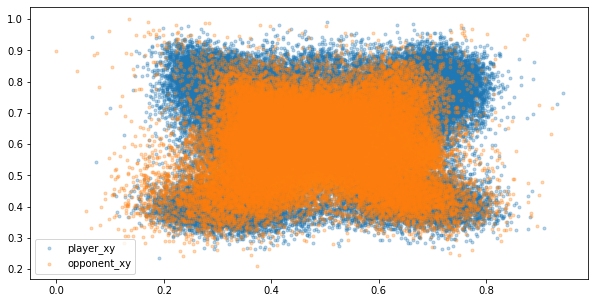

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(matches.player_location_x, matches.player_location_y, marker='.', alpha=0.3, label='player_xy')
plt.scatter(matches.opponent_location_x, matches.opponent_location_y, marker='.', alpha=0.3, label='opponent_xy')

# plt.scatter(Ax, Ay, marker='.', alpha=0.1, label='new')
# plt.scatter(Bx, By, marker='.', alpha=0.1, label='new')
# plt.plot((0,350), (480, 480), 'r--')
plt.legend()
plt.show()

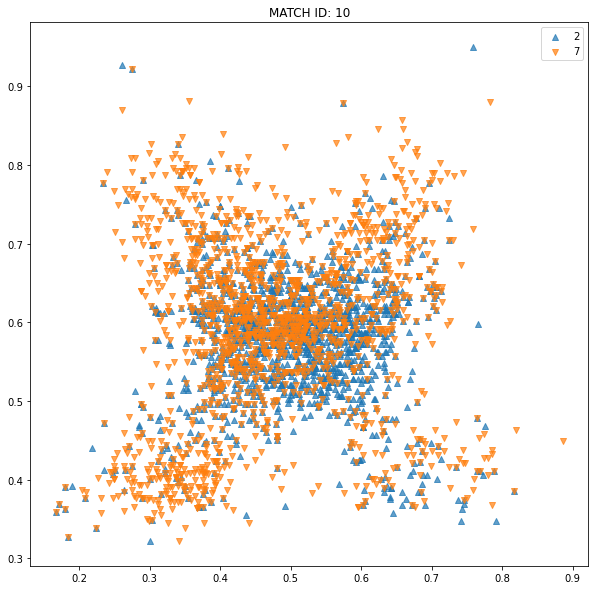

In [41]:
'''PLOT ONE MATCH'''
X = {}
Y = {}
match_id = 10
for name in matches.loc[matches.match_id==match_id].player.unique():
    X[name] = []
    Y[name] = []
    X[name] += matches.loc[(matches.match_id==0)&(matches.player==name)].player_location_x.values.tolist()
    X[name] += matches.loc[(matches.match_id==0)&~(matches.player==name)].opponent_location_x.values.tolist()
    Y[name] += matches.loc[(matches.match_id==0)&(matches.player==name)].player_location_y.values.tolist()
    Y[name] += matches.loc[(matches.match_id==0)&~(matches.player==name)].opponent_location_y.values.tolist()

K = list(X.keys())

plt.figure(figsize=(10,10))
plt.title(f'MATCH ID: {match_id}')
plt.scatter(X[K[0]], Y[K[0]], marker='^', alpha=0.7, label=K[0])
plt.scatter(X[K[1]], Y[K[1]], marker='v', alpha=0.7, label=K[1])
plt.legend()
plt.show()

In [42]:
matches.to_csv('../data/clear_data.csv', index=False)

In [43]:
_match

,ball_round,player,roundscore_A,roundscore_B,player_location_x,player_location_y,opponent_location_x,opponent_location_y,match_id,set_id,rally_id,video_name,winner,loser,type
60460,1.0,tai tzu ying,0,1,161.441942,322.038540,233.087625,685.356877,73,0,1,Tai_Tzu_Ying_Pusarla_V._Sindhu_HSBC_BWF_WORLD_...,tai tzu ying,pusarla v. sindhu,發長球
60461,2.0,pusarla v. sindhu,0,1,205.870056,779.688409,161.350744,312.563903,73,0,1,Tai_Tzu_Ying_Pusarla_V._Sindhu_HSBC_BWF_WORLD_...,tai tzu ying,pusarla v. sindhu,殺球
60464,2.0,pusarla v. sindhu,2,1,111.831718,790.326972,147.190350,300.387626,73,0,3,Tai_Tzu_Ying_Pusarla_V._Sindhu_HSBC_BWF_WORLD_...,tai tzu ying,pusarla v. sindhu,殺球
60465,3.0,tai tzu ying,2,1,145.035495,283.280505,144.927843,753.688386,73,0,3,Tai_Tzu_Ying_Pusarla_V._Sindhu_HSBC_BWF_WORLD_...,tai tzu ying,pusarla v. sindhu,擋小球
60466,4.0,pusarla v. sindhu,2,1,254.012845,585.550335,222.779335,303.781761,73,0,3,Tai_Tzu_Ying_Pusarla_V._Sindhu_HSBC_BWF_WORLD_...,tai tzu ying,pusarla v. sindhu,放小球
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61191,2.0,tai tzu ying,20,12,200.518793,559.414936,163.677313,300.602348,73,2,32,Tai_Tzu_Ying_Pusarla_V._Sindhu_HSBC_BWF_WORLD_...,tai tzu ying,pusarla v. sindhu,推球
61192,3.0,pusarla v. sindhu,20,12,210.444618,246.417421,207.376012,649.338604,73,2,32,Tai_Tzu_Ying_Pusarla_V._Sindhu_HSBC_BWF_WORLD_...,tai tzu ying,pusarla v. sindhu,長球
61193,4.0,tai tzu ying,20,12,149.770425,728.365866,183.332820,261.336745,73,2,32,Tai_Tzu_Ying_Pusarla_V._Sindhu_HSBC_BWF_WORLD_...,tai tzu ying,pusarla v. sindhu,切球
61195,2.0,pusarla v. sindhu,21,12,123.130979,292.793739,190.749016,659.857014,73,2,33,Tai_Tzu_Ying_Pusarla_V._Sindhu_HSBC_BWF_WORLD_...,tai tzu ying,pusarla v. sindhu,長球


In [64]:
from tqdm import tqdm
# create same size sequences
train_dataset = []
test_dataset = []

# get test_ratio prc of rallys from every match
test_ratio = 0.2

# Format data parameters 
max_seq_len = 20
pad_value = 12

# main loop
for mid in tqdm(matches.match_id.unique()):
    _match = matches.loc[matches.match_id==mid]
    
    all_rallys = []
    
    for sid in _match.set_id.unique():
        _set = _match.loc[_match.set_id==sid]
        for rid in _set.rally_id.unique():
            _rally = _set.loc[_set.rally_id==rid]
            
            # select only hitrtype
            curr_rally = _rally.loc[:, 'hittype__切球':'hittype__長球'].values.argmax(1)
            # Because hittype values form 0 to 10 and SOS token is also 0, we must add 1
            curr_rally = curr_rally + 1
            
            # pad curr_rally sequence
            if len(curr_rally) < max_seq_len:
                pad_size = max_seq_len - len(curr_rally)
                pad = np.zeros(pad_size) + pad_value
                curr_rally = np.concatenate((curr_rally, pad))
            elif len(curr_rally) > max_seq_len:
                curr_rally = curr_rally[:max_seq_len]
            
            all_rallys += [curr_rally]
    
    # train/test split
    n_test = int(len(all_rallys) * test_ratio)

    train_dataset += all_rallys[n_test:]
    test_dataset += all_rallys[:n_test]

# convert to right format 
test_dataset = np.array(test_dataset, dtype=int)
train_dataset = np.array(train_dataset, dtype=int)


100%|████████████████████████████████████████| 74/74 [00:02<00:00, 33.46it/s]


In [66]:
def save2file(array, filename):
    with open(filename, 'w') as file:
        for row in array:
            L = row.tolist()
            s = ' '.join(str(l) for l in L) + '\n'
            file.write(s)
            
train_path = '../data/real_hittype.txt'
test_path = '../data/eval_hittype.txt'

save2file(train_dataset, train_path)
save2file(test_dataset, test_path)

In [59]:
len(train_dataset), len(test_dataset)

(4730, 1143)

In [61]:
# Vocab size
np.unique(train_dataset).size

12

In [62]:
# np.save('../data/train_hittypes', train_dataset)
# np.save('../data/test_hittypes', test_dataset)

In [63]:
# matches.columns

In [42]:
# matches.to_csv('../../seq_gan_wordseq/data/final_data.csv', index=False)

In [43]:
seq_matches = []
seq_ids = []
seq_len = 20

rally_unique_id = 0

for match_id in matches.match_id.unique():
    _match = matches.loc[matches.match_id == match_id]
    rally_unique_id += 1
    seq_matches += [[]]
    for set_id in _match.set_id.unique():
        _set = _match.loc[_match.set_id == set_id]
        for rally_id in _set.rally_id.unique():
            _rally = _set.loc[_set.rally_id == rally_id]
            _rally = _rally.sort_values(by=['ball_round']).reset_index()
            
            seq = _rally.iloc[:,-11:].values.argmax(1)+1
            pad = seq_len - seq.size
            if pad > 0:
                seq = np.concatenate((seq, np.zeros(pad))) 
            else:
                seq = seq[:seq_len]
                
            seq_matches[-1] += [seq]
            seq_ids += [rally_unique_id]
#         seq_matches[-1] = np.array(seq_matches[-1])

In [41]:
1/0

ZeroDivisionError: division by zero

In [ ]:
# from itertools import permutations

# def unique_permutations(iterable, r=None):
#     previous = tuple()
#     for p in permutations(sorted(iterable), r):
#         if p > previous:
#             previous = p
#             yield p

# p = unique_permutations('qwertyuiopa', 10)
# len(list(p))
# # for p in unique_permutations('cabcab', 3):
# #     print(p)

In [ ]:
# seq_matches[0]

In [ ]:
seq_ids = np.array(seq_ids)

sizes = []
for i in np.unique(seq_ids):
    s = seq_ids[seq_ids==i].size
    sizes += [s]

In [ ]:
print(np.mean(sizes))
plt.plot(sizes)
plt.show()


In [ ]:
np.array(seq_matches).shape

In [ ]:
path = '../data/seq_hits'
np.save(path, np.array(seq_matches).astype(int))

In [ ]:
path = '../data/seq_ids'
np.save(path, np.array(seq_ids).astype(int))


In [47]:
path = '../../nested_seg_gan/data/seq_matches'
np.save(path, np.array(seq_matches, dtype='object'))


Ok seems like normalization was sucsessful. Now we need to prove that player styles are actually different.  
How do we define style? I would say, if we can distingwish players by hittype and locations, then they have styles.
- [ ] CHECK IF PLAYER HAVE DIFFERENT STYLE FOR DIFFERENT OPPONENTS
- [ ] CHECK IF PLAYERS OVERALL HAVE DIFFERENT STLYLES

In [ ]:
# X = []
# for player in matches.player.unique():
#     C = ['player_location_x','player_location_y']
#     coords = matches[matches.player==player][C]
#     hit_types = matches[matches.player==player].iloc[:, -11:]
#     hit_types /= matches[matches.player==player].match_id.unique().size
#     X += [hit_types.values.sum(0)]

# X = np.array(X)

In [ ]:
# import numpy as np
# from sklearn.decomposition import PCA
# # X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# pca = PCA(n_components=2)
# new_X = pca.fit_transform(X)

In [ ]:
# plt.figure(figsize=(20,10))
# for i, player in enumerate(matches.player.unique()):
#     plt.plot(new_X.T[0,i], new_X.T[1,i], 'o', label=player)

# plt.title('PCA STYLE')
# plt.legend()